# Project_Notes_006

## New York City Airbnb
In this project, a data with 102599 rows and 26 columns will be used to predict New York City Airbnb apartment prices. DecisionTreeRegressor and XGB will be applied and the algorithm with the lowest RMSE tuned so that the best hyperparameters are selected for the final model.

In [1]:
# Surpress Warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import required modules.
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
# Define path.
path = './data/Project_Notes_006_NYC_Airbnb.parquet'

In [3]:
# Import the dataset.
airbnb = pd.read_parquet(path)

In [4]:
# Print the shape and head of the dataframe.
print(f'Shape of dataset: {airbnb.shape}\n')
airbnb.head()

Shape of dataset: (102599, 26)



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None


In [5]:
# Check info of dataframe.
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
# List all features.
airbnb.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [7]:
# Define required columns and new dataframe.
cols = ['host_identity_verified', 'neighbourhood group', 'lat', 'long', 'instant_bookable', 
        'cancellation_policy', 'room type', 'Construction year', 'service fee', 'price']

df = airbnb[cols]

In [8]:
# Print the shape and head of the new dataframe.
print(f'Shape of dataframe: {df.shape}\n')
airbnb.head()

Shape of dataframe: (102599, 10)



,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,None
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,None
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,None,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,None,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",None
3,1002755,None,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,None,None
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",None


In [9]:
# Replace spaces in column names with underscore.
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['host_identity_verified', 'neighbourhood_group', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'service_fee', 'price'],
      dtype='object')

In [10]:
# Check for missing values.
df.isnull().sum()

host_identity_verified    289
neighbourhood_group        29
lat                         8
long                        8
instant_bookable          105
cancellation_policy        76
room_type                   0
construction_year         214
service_fee               273
price                     247
dtype: int64

In [11]:
# Remove data with null values.
df = df.dropna()
df.isnull().sum()

host_identity_verified    0
neighbourhood_group       0
lat                       0
long                      0
instant_bookable          0
cancellation_policy       0
room_type                 0
construction_year         0
service_fee               0
price                     0
dtype: int64

In [12]:
# Check data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101535 entries, 0 to 102598
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host_identity_verified  101535 non-null  object 
 1   neighbourhood_group     101535 non-null  object 
 2   lat                     101535 non-null  float64
 3   long                    101535 non-null  float64
 4   instant_bookable        101535 non-null  object 
 5   cancellation_policy     101535 non-null  object 
 6   room_type               101535 non-null  object 
 7   construction_year       101535 non-null  float64
 8   service_fee             101535 non-null  object 
 9   price                   101535 non-null  object 
dtypes: float64(3), object(7)
memory usage: 8.5+ MB


In [13]:
# Remove ',' and '$' signs from price and service_fee columns.
df['price'] = df.price.str.replace(',', '')
df['price'] = df.price.str.replace('$', '')
df['service_fee'] = df.service_fee.str.replace(',', '')
df['service_fee'] = df.service_fee.str.replace('$', '')
df.head()

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,price
0,unconfirmed,Brooklyn,40.64749,-73.97237,False,strict,Private room,2020.0,193,966
1,verified,Manhattan,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,28,142
3,unconfirmed,Brooklyn,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,74,368
4,verified,Manhattan,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,41,204
5,verified,Manhattan,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,115,577


In [14]:
# Change the type of instant_bookable, construction_year, service_fee and price.
df['instant_bookable'] = df.instant_bookable.astype('int64')
df['construction_year'] = df.construction_year.astype('int64')
df['service_fee'] = df.service_fee.astype('int64')
df['price'] = df.price.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101535 entries, 0 to 102598
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   host_identity_verified  101535 non-null  object 
 1   neighbourhood_group     101535 non-null  object 
 2   lat                     101535 non-null  float64
 3   long                    101535 non-null  float64
 4   instant_bookable        101535 non-null  int64  
 5   cancellation_policy     101535 non-null  object 
 6   room_type               101535 non-null  object 
 7   construction_year       101535 non-null  int64  
 8   service_fee             101535 non-null  int64  
 9   price                   101535 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 8.5+ MB


In [15]:
# Check the head of the dataframe again.
df.head()

,host_identity_verified,neighbourhood_group,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,price
0,unconfirmed,Brooklyn,40.64749,-73.97237,0,strict,Private room,2020,193,966
1,verified,Manhattan,40.75362,-73.98377,0,moderate,Entire home/apt,2007,28,142
3,unconfirmed,Brooklyn,40.68514,-73.95976,1,moderate,Entire home/apt,2005,74,368
4,verified,Manhattan,40.79851,-73.94399,0,moderate,Entire home/apt,2009,41,204
5,verified,Manhattan,40.74767,-73.97500,1,flexible,Entire home/apt,2013,115,577


In [16]:
# Check for dimentionality
object = df.select_dtypes(include='object')

for col in object.columns:
    print(object[col].value_counts())
    print()

host_identity_verified
unconfirmed    50801
verified       50734
Name: count, dtype: int64

neighbourhood_group
Manhattan        43357
Brooklyn         41395
Queens           13152
Bronx             2687
Staten Island      943
brookln              1
Name: count, dtype: int64

cancellation_policy
moderate    34020
strict      33806
flexible    33709
Name: count, dtype: int64

room_type
Entire home/apt    53145
Private room       46068
Shared room         2208
Hotel room           114
Name: count, dtype: int64



In [17]:
# Convert 'brookln' in neighbourhood_group to 'Brooklyn'.
df.neighbourhood_group.replace('brookln', 'Brooklyn', inplace=True)

In [18]:
# Check dimentionality of neighbourhood_group.
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43357
Brooklyn         41396
Queens           13152
Bronx             2687
Staten Island      943
Name: count, dtype: int64

In [19]:
# Split dataset to train, test and validation sets.
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset index.
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)

# Extract y_train and y_val.
y_train = df_train.price.values
y_val = df_val.price.values

# Remove 'price' column from df_train and df_val.
del df_train['price']
del df_val['price']

In [20]:
# Convert df_train and df_val to dictionaries.
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')

# Implement dictvectorizer.
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [21]:
# Train a decision tree regressor model.
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
# Calculate the RMSE of dtr.
pred_val_dtr = dtr.predict(X_val)
RMSE_val_dtr = np.sqrt(mean_squared_error(y_val, pred_val_dtr))
print('RMSE_val_dtr:', RMSE_val_dtr)

RMSE_val_dtr: 1.6997069723325644


In [23]:
# Train an XGB model.
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [24]:
# Create a function for the xgb parameters.
def set_xgb_params(eta_e, max_d, min_c):
    xgb_params = {
                  'eta': eta_e,
                  'max_depth': max_d,
                  'min_child_weight': min_c,
    
                  'objective': 'reg:squarederror',
                  'nthread': 8,
    
                  'seed': 1,
                  'verbosity': 1
                  }
    return xgb_params

In [25]:
# Run the model.
xgb_params = set_xgb_params(0.3, 6, 1)
model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [26]:
# Calculate the RMSE of xgb.
pred_val_xgb = model.predict(dval)
RMSE_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print('RMSE_val_xgb:', RMSE_val_xgb)

RMSE_val_xgb: 1.383520541648735


XGB is the better model

In [27]:
%%capture output

xgb_params = set_xgb_params(0.3, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [28]:
# Show the captured output.
output.stdout

'[0]\ttrain-rmse:232.03469\teval-rmse:232.41274\n[5]\ttrain-rmse:39.12922\teval-rmse:39.18844\n[10]\ttrain-rmse:6.78423\teval-rmse:6.78736\n[15]\ttrain-rmse:1.86358\teval-rmse:1.85931\n[20]\ttrain-rmse:1.45235\teval-rmse:1.45514\n[25]\ttrain-rmse:1.41590\teval-rmse:1.42570\n[30]\ttrain-rmse:1.40244\teval-rmse:1.42197\n[35]\ttrain-rmse:1.39244\teval-rmse:1.41790\n[40]\ttrain-rmse:1.38256\teval-rmse:1.41461\n[45]\ttrain-rmse:1.37288\teval-rmse:1.41208\n[50]\ttrain-rmse:1.36559\teval-rmse:1.41064\n[55]\ttrain-rmse:1.35830\teval-rmse:1.40980\n[60]\ttrain-rmse:1.34990\teval-rmse:1.40724\n[65]\ttrain-rmse:1.34387\teval-rmse:1.40656\n[70]\ttrain-rmse:1.33685\teval-rmse:1.40530\n[75]\ttrain-rmse:1.32908\teval-rmse:1.40396\n[80]\ttrain-rmse:1.32297\teval-rmse:1.40305\n[85]\ttrain-rmse:1.31619\teval-rmse:1.40175\n[90]\ttrain-rmse:1.30948\teval-rmse:1.40099\n[95]\ttrain-rmse:1.30203\teval-rmse:1.39990\n[100]\ttrain-rmse:1.29548\teval-rmse:1.39949\n[105]\ttrain-rmse:1.28927\teval-rmse:1.39849\n[11

In [29]:
# print the output.
print(output.stdout)

[0]	train-rmse:232.03469	eval-rmse:232.41274
[5]	train-rmse:39.12922	eval-rmse:39.18844
[10]	train-rmse:6.78423	eval-rmse:6.78736
[15]	train-rmse:1.86358	eval-rmse:1.85931
[20]	train-rmse:1.45235	eval-rmse:1.45514
[25]	train-rmse:1.41590	eval-rmse:1.42570
[30]	train-rmse:1.40244	eval-rmse:1.42197
[35]	train-rmse:1.39244	eval-rmse:1.41790
[40]	train-rmse:1.38256	eval-rmse:1.41461
[45]	train-rmse:1.37288	eval-rmse:1.41208
[50]	train-rmse:1.36559	eval-rmse:1.41064
[55]	train-rmse:1.35830	eval-rmse:1.40980
[60]	train-rmse:1.34990	eval-rmse:1.40724
[65]	train-rmse:1.34387	eval-rmse:1.40656
[70]	train-rmse:1.33685	eval-rmse:1.40530
[75]	train-rmse:1.32908	eval-rmse:1.40396
[80]	train-rmse:1.32297	eval-rmse:1.40305
[85]	train-rmse:1.31619	eval-rmse:1.40175
[90]	train-rmse:1.30948	eval-rmse:1.40099
[95]	train-rmse:1.30203	eval-rmse:1.39990
[100]	train-rmse:1.29548	eval-rmse:1.39949
[105]	train-rmse:1.28927	eval-rmse:1.39849
[110]	train-rmse:1.28379	eval-rmse:1.39726
[115]	train-rmse:1.27810	ev

In [30]:
# Function to convert output to dataframe
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

        columns = ['num_iter', 'train_rmse', 'val_rmse']
        df_results = pd.DataFrame(results, columns=columns)

    return df_results

In [31]:
# Convert the output
df_score = parse_xgb_output(output)
df_score

,num_iter,train_rmse,val_rmse
0,0,232.03469,232.41274
1,5,39.12922,39.18844
2,10,6.78423,6.78736
3,15,1.86358,1.85931
4,20,1.45235,1.45514
5,25,1.41590,1.42570
6,30,1.40244,1.42197
7,35,1.39244,1.41790
8,40,1.38256,1.41461
9,45,1.37288,1.41208


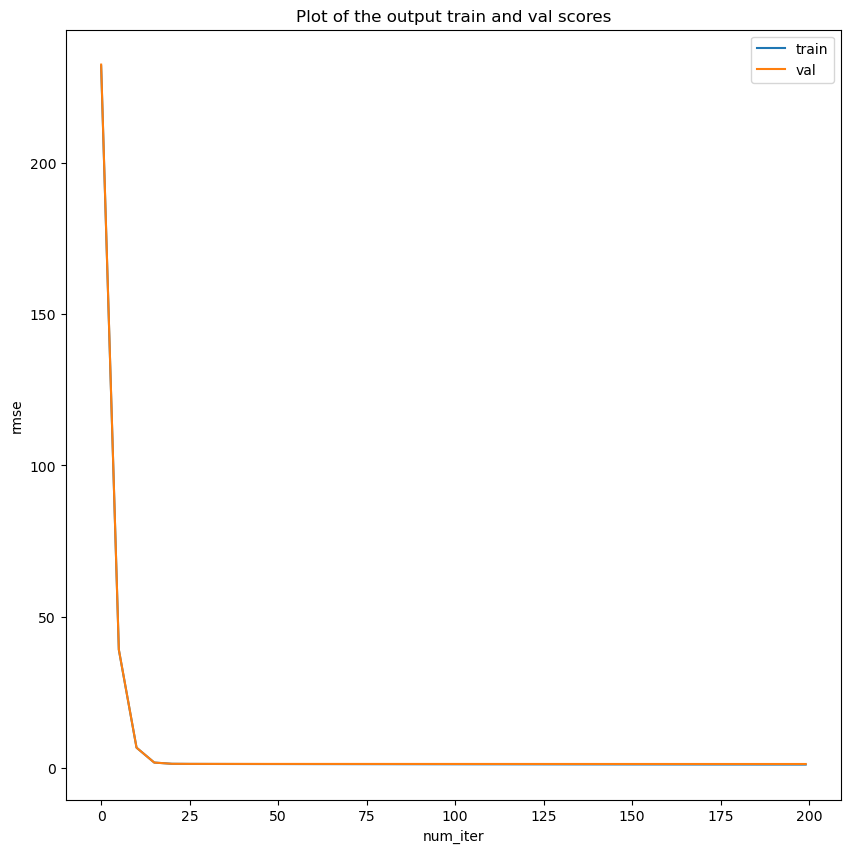

In [32]:
# Plot the output train and val scores.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of the output train and val scores')
plt.legend();

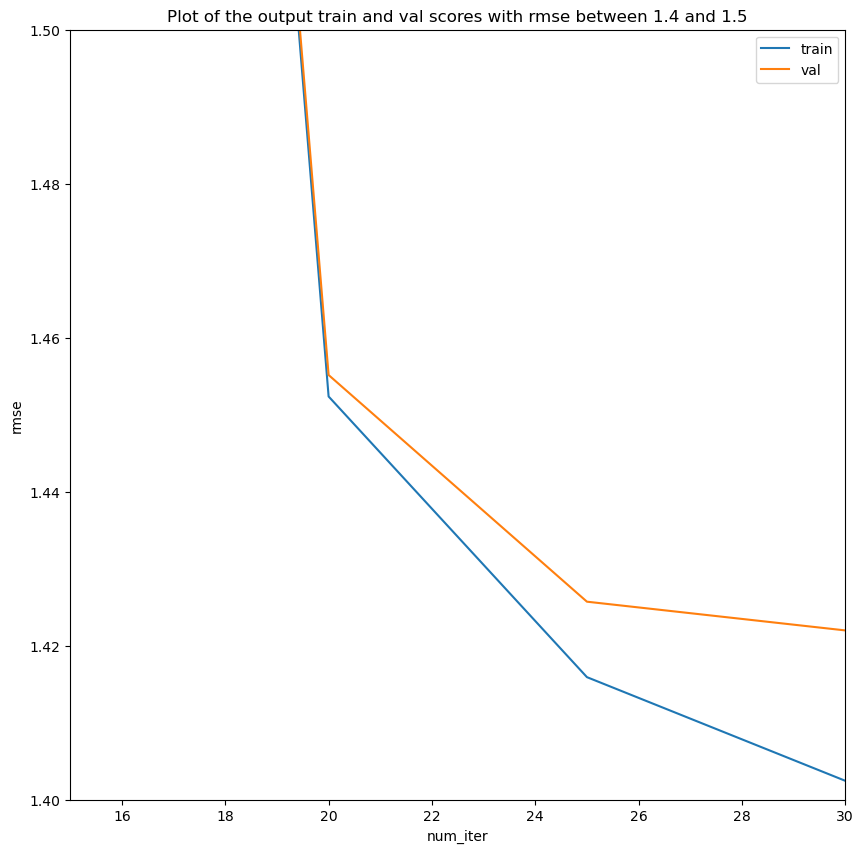

In [33]:
# Plot the output train and val scores with rmse between 1.4 and 1.5.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.xlim(15, 30)
plt.ylim(1.4, 1.5)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of the output train and val scores with rmse between 1.4 and 1.5')
plt.legend();

Create output for eta = 0.1

In [34]:
%%capture output

xgb_params = set_xgb_params(0.1, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [35]:
eta_0_1 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.2

In [36]:
%%capture output

xgb_params = set_xgb_params(0.2, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [37]:
eta_0_2 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.3

In [38]:
%%capture output

xgb_params = set_xgb_params(0.3, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [39]:
eta_0_3 = parse_xgb_output(output)['val_rmse']

Create output for eta = 0.5

In [40]:
%%capture output

xgb_params = set_xgb_params(0.5, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [41]:
eta_0_5 = parse_xgb_output(output)['val_rmse']

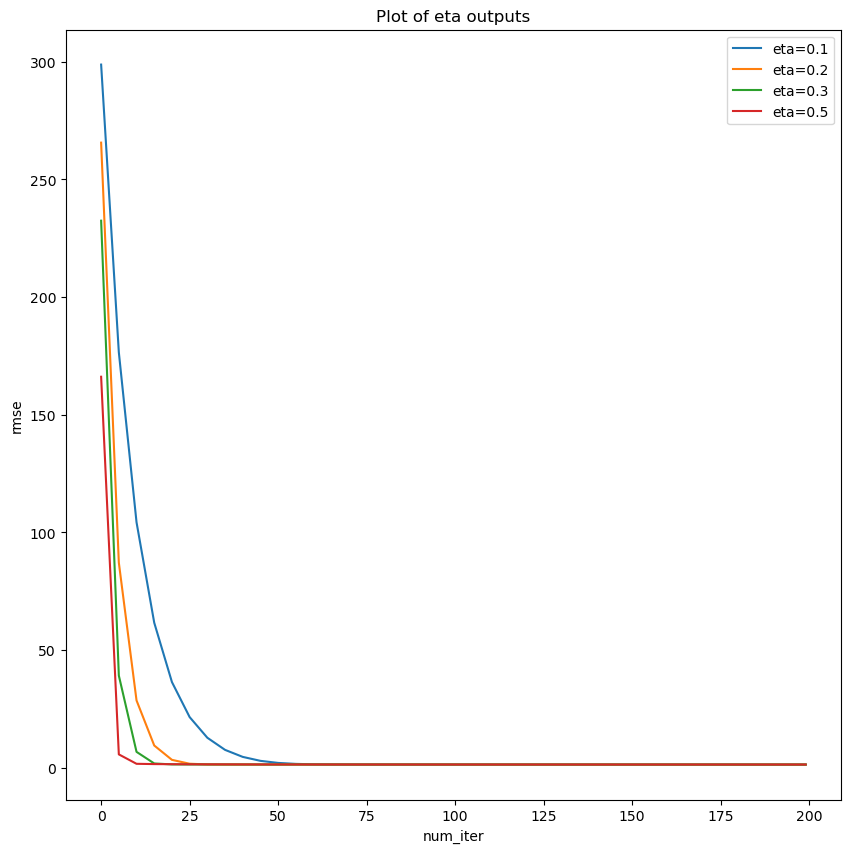

In [42]:
# Plot the eta outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, eta_0_1, label='eta=0.1')
plt.plot(df_score.num_iter, eta_0_2, label='eta=0.2')
plt.plot(df_score.num_iter, eta_0_3, label='eta=0.3')
plt.plot(df_score.num_iter, eta_0_5, label='eta=0.5')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of eta outputs')
plt.legend();

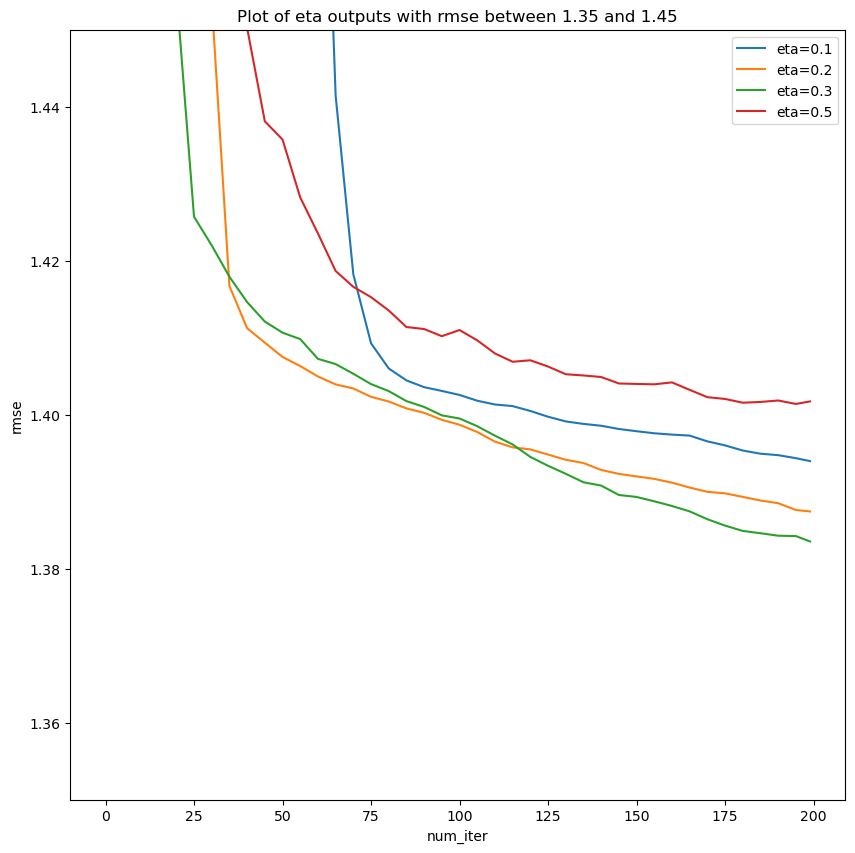

In [43]:
# Plot the eta outputs with rmse between 1.35 and 1.45.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, eta_0_1, label='eta=0.1')
plt.plot(df_score.num_iter, eta_0_2, label='eta=0.2')
plt.plot(df_score.num_iter, eta_0_3, label='eta=0.3')
plt.plot(df_score.num_iter, eta_0_5, label='eta=0.5')
plt.ylim(1.35, 1.45)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of eta outputs with rmse between 1.35 and 1.45')
plt.legend();

The best eta is 0.3

Create output for max_depth = 6

In [44]:
%%capture output

xgb_params = set_xgb_params(0.3, 6, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [45]:
max_6 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 10

In [46]:
%%capture output

xgb_params = set_xgb_params(0.3, 10, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [47]:
max_10 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 20

In [48]:
%%capture output

xgb_params = set_xgb_params(0.3, 20, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [49]:
max_20 = parse_xgb_output(output)['val_rmse']

Create output for max_depth = 30

In [50]:
%%capture output

xgb_params = set_xgb_params(0.3, 30, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [51]:
max_30 = parse_xgb_output(output)['val_rmse']

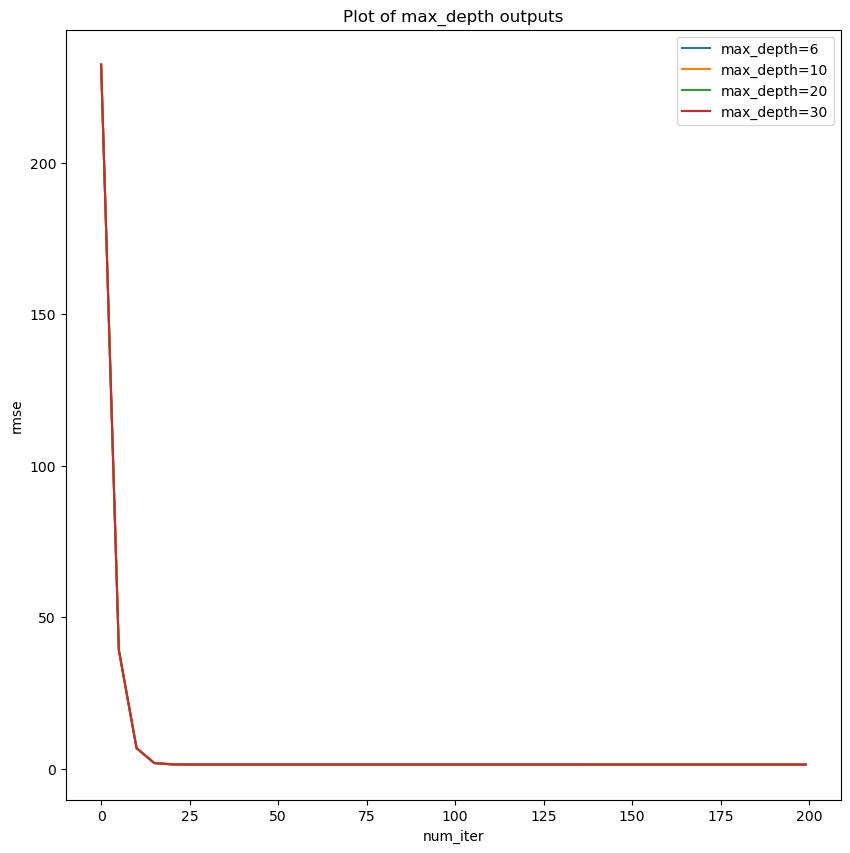

In [52]:
# Plot the max_depth outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, max_6, label='max_depth=6')
plt.plot(df_score.num_iter, max_10, label='max_depth=10')
plt.plot(df_score.num_iter, max_20, label='max_depth=20')
plt.plot(df_score.num_iter, max_30, label='max_depth=30')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of max_depth outputs')
plt.legend();

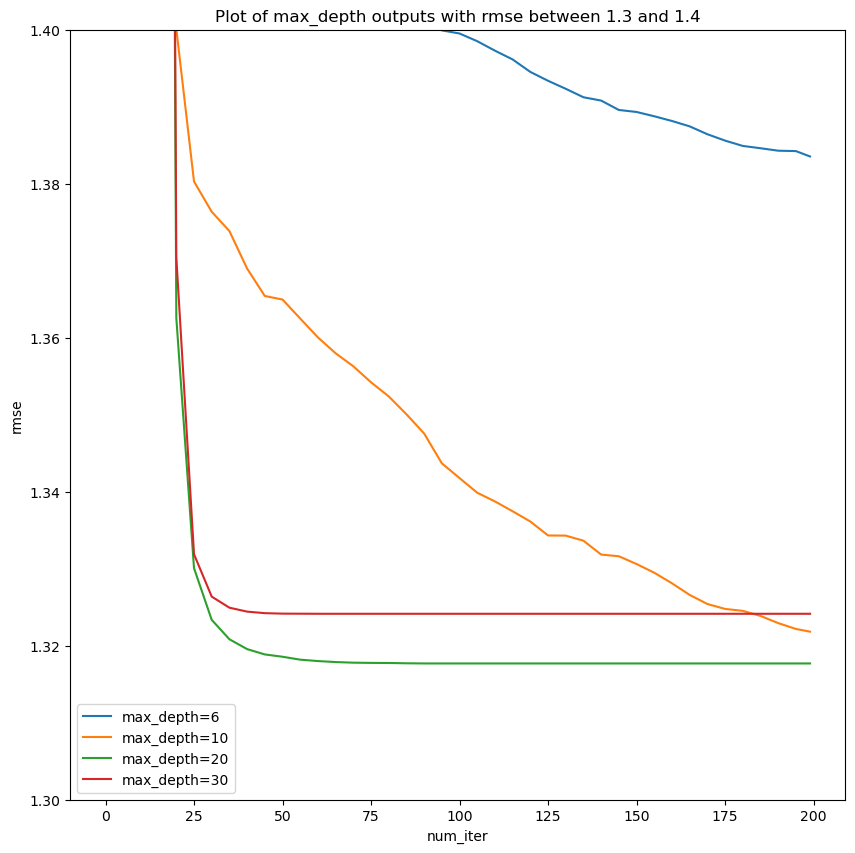

In [53]:
# Plot the max_depth outputs with rmse between 1.3 and 1.4.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, max_6, label='max_depth=6')
plt.plot(df_score.num_iter, max_10, label='max_depth=10')
plt.plot(df_score.num_iter, max_20, label='max_depth=20')
plt.plot(df_score.num_iter, max_30, label='max_depth=30')
plt.ylim(1.3, 1.4)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of max_depth outputs with rmse between 1.3 and 1.4')
plt.legend();

The best max_depth = 20

Create output for min_child_weight = 1

In [54]:
%%capture output

xgb_params = set_xgb_params(0.3, 20, 1)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [55]:
min_1 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 3

In [56]:
%%capture output

xgb_params = set_xgb_params(0.3, 20, 3)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [57]:
min_3 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 10

In [58]:
%%capture output

xgb_params = set_xgb_params(0.3, 20, 10)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [59]:
min_10 = parse_xgb_output(output)['val_rmse']

Create output for min_child_weight = 20

In [60]:
%%capture output

xgb_params = set_xgb_params(0.3, 20, 20)

watchlist  = [(dtrain,'train'), (dval,'eval')]

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [61]:
min_20 = parse_xgb_output(output)['val_rmse']

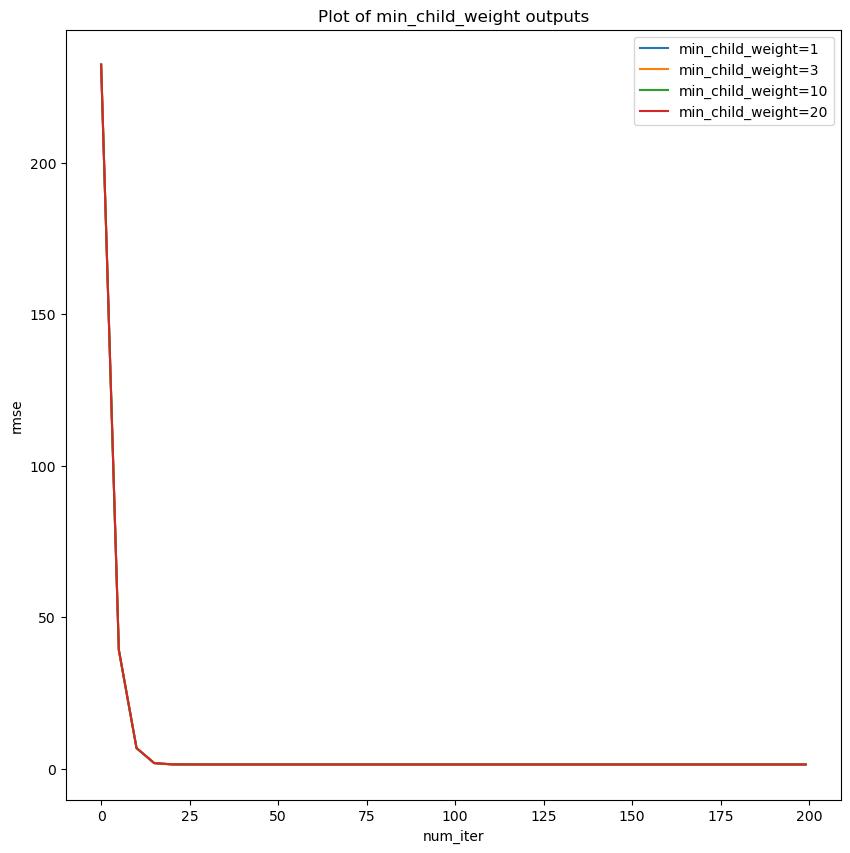

In [62]:
# Plot the max_depth outputs.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, min_1, label='min_child_weight=1')
plt.plot(df_score.num_iter, min_3, label='min_child_weight=3')
plt.plot(df_score.num_iter, min_10, label='min_child_weight=10')
plt.plot(df_score.num_iter, min_20, label='min_child_weight=20')
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of min_child_weight outputs')
plt.legend();

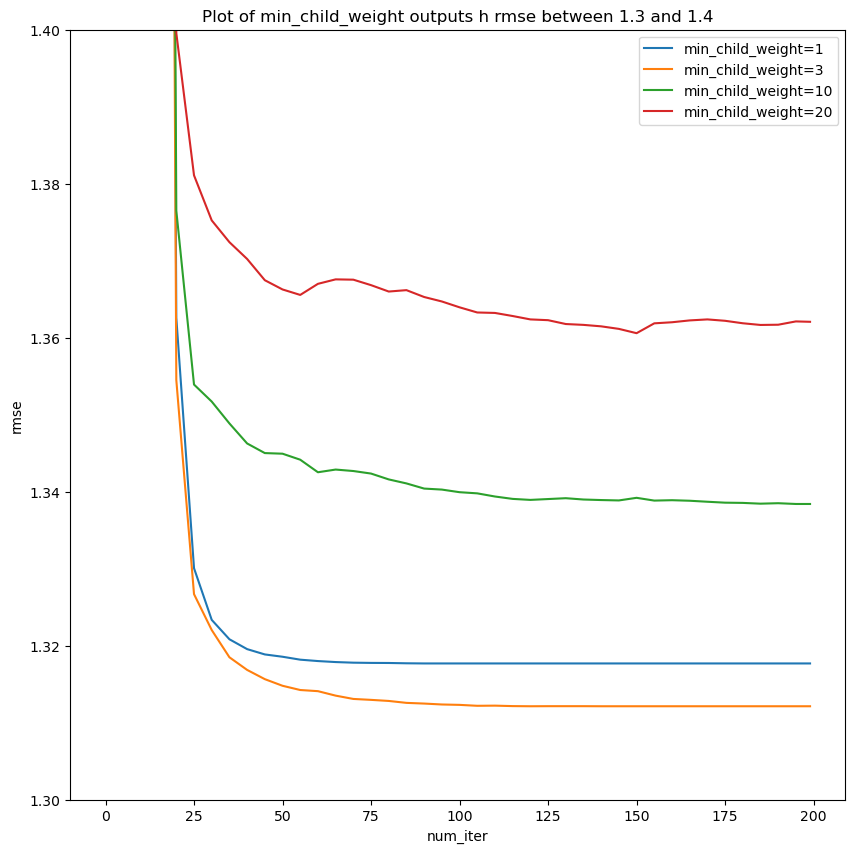

In [63]:
# Plot the max_depth outputs h rmse between 1.3 and 1.4.
plt.figure(figsize = (10, 10))
plt.plot(df_score.num_iter, min_1, label='min_child_weight=1')
plt.plot(df_score.num_iter, min_3, label='min_child_weight=3')
plt.plot(df_score.num_iter, min_10, label='min_child_weight=10')
plt.plot(df_score.num_iter, min_20, label='min_child_weight=20')
plt.ylim(1.3, 1.4)
plt.xlabel('num_iter')
plt.ylabel('rmse')
plt.title('Plot of min_child_weight outputs h rmse between 1.3 and 1.4')
plt.legend();

The best min_child_weight = 3

In [64]:
# Use the best parameter to find the model rmse.

xgb_params = set_xgb_params(0.3, 20, 3)

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [65]:
# Calculate the best RMSE of xgb.
pred_val_xgb = model.predict(dval)
RMSE_val_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
print('RMSE_val_xgb:', RMSE_val_xgb)

RMSE_val_xgb: 1.3121185139396214


In [66]:
# Training with full train.
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = df_full_train.price.values
y_test = df_test.price.values

del df_full_train['price']
del df_test['price']

full_train_dict = df_full_train.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

X_full_train = dv.fit_transform(full_train_dict)
X_test = dv.transform(test_dict)

features = list(dv.get_feature_names_out())

dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, 
                          feature_names=features)

dtest = xgb.DMatrix(X_test, label=y_test, 
                    feature_names=features)

In [67]:
# Fit the model.
xgb_params = set_xgb_params(0.3, 20, 3)

# Build model.
final_model = xgb.train(xgb_params, dfull_train, num_boost_round=200)

In [68]:
# Calculate the RMSE of xgb with X_test.
pred_test_xgb = final_model.predict(dtest)
RMSE_test_xgb = np.sqrt(mean_squared_error(y_test, pred_test_xgb))
print('RMSE_test_xgb:', RMSE_test_xgb)

RMSE_test_xgb: 1.2356099756582724


In [69]:
# Save the model to disk.
filename = './data/Project_Notes_006_model.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [70]:
# load the model from disk.
pickled_model = pickle.load(open(filename, 'rb'))

In [71]:
# Select data to predict.
raw_data = df.iloc[200, :]
raw_data

host_identity_verified           verified
neighbourhood_group              Brooklyn
lat                               40.6848
long                            -73.96219
instant_bookable                        0
cancellation_policy              flexible
room_type                 Entire home/apt
construction_year                    2006
service_fee                           140
price                                 701
Name: 325, dtype: object

In [72]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'verified',
            'neighbourhood_group': 'Brooklyn',
            'lat': 40.6848,
            'long': -73.9621,
            'instant_bookable': False,
            'cancellation_policy': 'flexible',
            'room_type': 'Entire home/apt',
            'construction_year': 2006,
            'service_fee': 140
            }

In [73]:
# Function to process raw data
def process_data(data):
    features = list(dv.get_feature_names_out())
    trans = dv.transform(data)
    dmatrix = xgb.DMatrix(trans, label=y_full_train, feature_names=features)
    return dmatrix

In [74]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

701.0894

In [75]:
# Select another data to predict.
raw_data = df.iloc[4002, :]
raw_data

host_identity_verified        unconfirmed
neighbourhood_group             Manhattan
lat                              40.78587
long                            -73.94764
instant_bookable                        1
cancellation_policy              moderate
room_type                 Entire home/apt
construction_year                    2012
service_fee                           140
price                                 698
Name: 4293, dtype: object

In [76]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'unconfirmed',
            'neighbourhood_group': 'Manhattan',
            'lat': 40.78587,
            'long': -73.94764,
            'instant_bookable': False,
            'cancellation_policy': 'moderate',
            'room_type': 'Entire home/apt',
            'construction_year': 2012,
            'service_fee': 140
            }

In [77]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

697.70483

In [78]:
# Select another data to predict.
raw_data = df.iloc[10202, :]
raw_data

host_identity_verified        unconfirmed
neighbourhood_group                Queens
lat                              40.74267
long                            -73.78737
instant_bookable                        1
cancellation_policy              flexible
room_type                 Entire home/apt
construction_year                    2009
service_fee                           194
price                                 972
Name: 10557, dtype: object

In [79]:
# Create dictionary for prediction.
raw_data = {
            'host_identity_verified': 'unconfirmed',
            'neighbourhood_group': 'Queens',
            'lat': 40.74267,
            'long': -73.78737,
            'instant_bookable': True,
            'cancellation_policy': 'flexible',
            'room_type': 'Private room',
            'construction_year': 2009,
            'service_fee': 194
            }

In [80]:
# Predict data.
trans_data = process_data(raw_data)
the_prediction = pickled_model.predict(trans_data)
the_prediction[0]

971.7574